In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import keras
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

In [2]:
s1_train = pd.read_csv('SalaryData_Train.csv')
s1_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12081,43,Private,9th,5,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,20,United-States,<=50K
12082,45,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,3137,0,35,United-States,<=50K
12083,24,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,Mexico,<=50K
12084,63,Private,9th,5,Married-civ-spouse,Farming-fishing,Husband,Black,Male,0,0,40,United-States,<=50K


In [3]:
s_t = s1_train.drop_duplicates()
s_t
import warnings
warnings.filterwarnings('ignore')


In [4]:
s_t.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,11398.000000,11398.000000,11398.000000,11398.000000,11398.000000
mean,38.662221,10.132216,1152.263818,94.669328,41.154501
std,13.129920,2.569961,7648.070274,415.103420,12.030630
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


# label encoding

In [5]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
s_t['workclass']= label_encoder.fit_transform(s_t['workclass'])
s_t['education']= label_encoder.fit_transform(s_t['education'])
s_t['maritalstatus']= label_encoder.fit_transform(s_t['maritalstatus'])
s_t['occupation']= label_encoder.fit_transform(s_t['occupation'])
s_t['relationship']= label_encoder.fit_transform(s_t['relationship'])
s_t['race']= label_encoder.fit_transform(s_t['race'])
s_t['sex']= label_encoder.fit_transform(s_t['sex'])
s_t['native']= label_encoder.fit_transform(s_t['native'])
s_t['Salary']= label_encoder.fit_transform(s_t['Salary'])

In [6]:
s_t


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12081,43,2,6,5,4,6,1,4,0,0,0,20,37,0
12082,45,2,11,9,2,6,0,2,1,3137,0,35,37,0
12083,24,2,11,9,2,11,0,4,1,0,0,40,24,0
12084,63,2,6,5,2,4,0,2,1,0,0,40,37,0


In [7]:
s_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11398 entries, 0 to 12085
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            11398 non-null  int64
 1   workclass      11398 non-null  int64
 2   education      11398 non-null  int64
 3   educationno    11398 non-null  int64
 4   maritalstatus  11398 non-null  int64
 5   occupation     11398 non-null  int64
 6   relationship   11398 non-null  int64
 7   race           11398 non-null  int64
 8   sex            11398 non-null  int64
 9   capitalgain    11398 non-null  int64
 10  capitalloss    11398 non-null  int64
 11  hoursperweek   11398 non-null  int64
 12  native         11398 non-null  int64
 13  Salary         11398 non-null  int64
dtypes: int64(14)
memory usage: 1.3 MB


In [8]:
s_t.shape

(11398, 14)

In [9]:
s_t.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [10]:
sns.pairplot(s_t, hue='Salary')

Output hidden; open in https://colab.research.google.com to view.

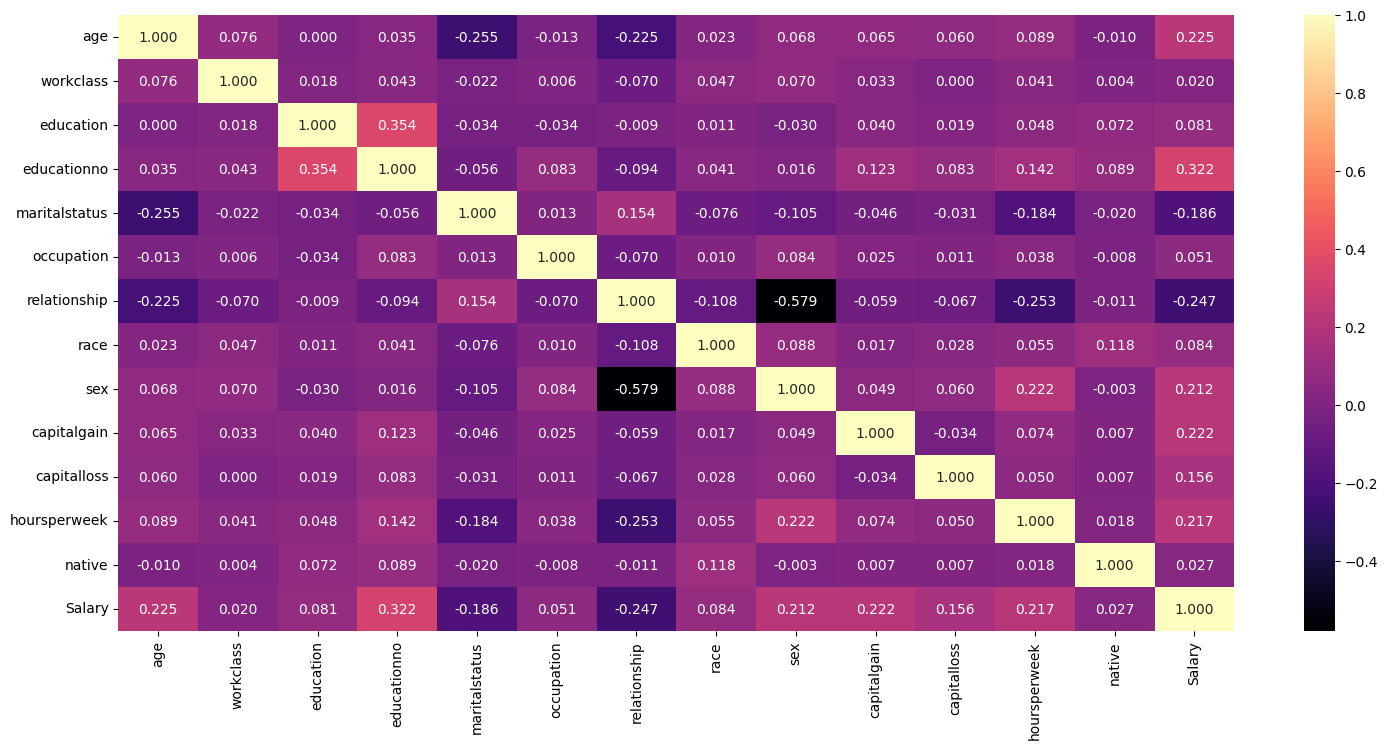

In [11]:
plt.figure(figsize = (18, 8));
sns.heatmap(s_t.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

<Axes: xlabel='hoursperweek', ylabel='Density'>

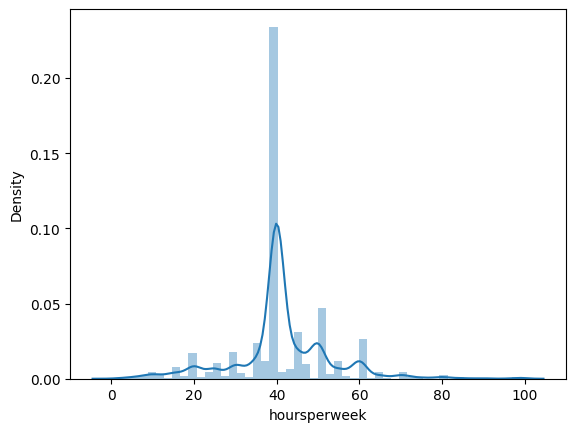

In [12]:
sns.distplot(s_t['hoursperweek'])

<Axes: xlabel='age', ylabel='educationno'>

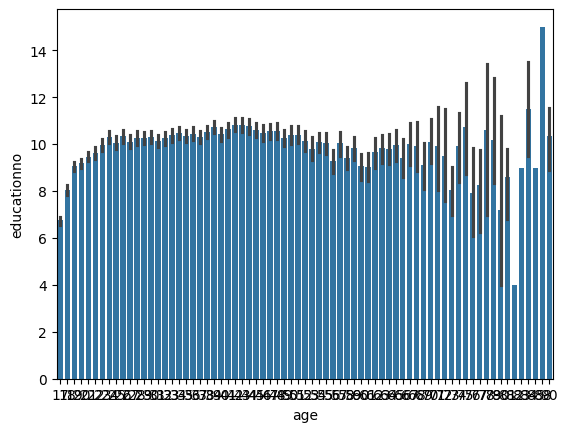

In [13]:
sns.barplot(x=s_t.age,y=s_t.educationno)

<Axes: xlabel='age', ylabel='hoursperweek'>

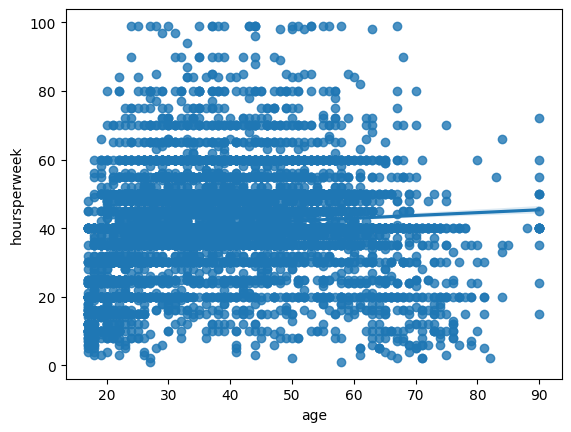

In [14]:
sns.regplot(x=s_t['age'],y=s_t['hoursperweek'])

# Test Dataset:

In [15]:
s2_test = pd.read_csv('SalaryData_Test.csv')
s2_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [16]:
salary_test = s2_test.drop_duplicates()
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


# Label Encoding

In [17]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
salary_test['workclass']= label_encoder.fit_transform(salary_test['workclass'])
salary_test['education']= label_encoder.fit_transform(salary_test['education'])
salary_test['maritalstatus']= label_encoder.fit_transform(salary_test['maritalstatus'])
salary_test['occupation']= label_encoder.fit_transform(salary_test['occupation'])
salary_test['relationship']= label_encoder.fit_transform(salary_test['relationship'])
salary_test['race']= label_encoder.fit_transform(salary_test['race'])
salary_test['sex']= label_encoder.fit_transform(salary_test['sex'])
salary_test['native']= label_encoder.fit_transform(salary_test['native'])
salary_test['Salary']= label_encoder.fit_transform(salary_test['Salary'])

In [18]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14130 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            14130 non-null  int64
 1   workclass      14130 non-null  int64
 2   education      14130 non-null  int64
 3   educationno    14130 non-null  int64
 4   maritalstatus  14130 non-null  int64
 5   occupation     14130 non-null  int64
 6   relationship   14130 non-null  int64
 7   race           14130 non-null  int64
 8   sex            14130 non-null  int64
 9   capitalgain    14130 non-null  int64
 10  capitalloss    14130 non-null  int64
 11  hoursperweek   14130 non-null  int64
 12  native         14130 non-null  int64
 13  Salary         14130 non-null  int64
dtypes: int64(14)
memory usage: 1.6 MB


In [19]:
salary_test.shape

(14130, 14)

In [20]:
salary_test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [21]:
sns.pairplot(salary_test, hue='Salary')

Output hidden; open in https://colab.research.google.com to view.

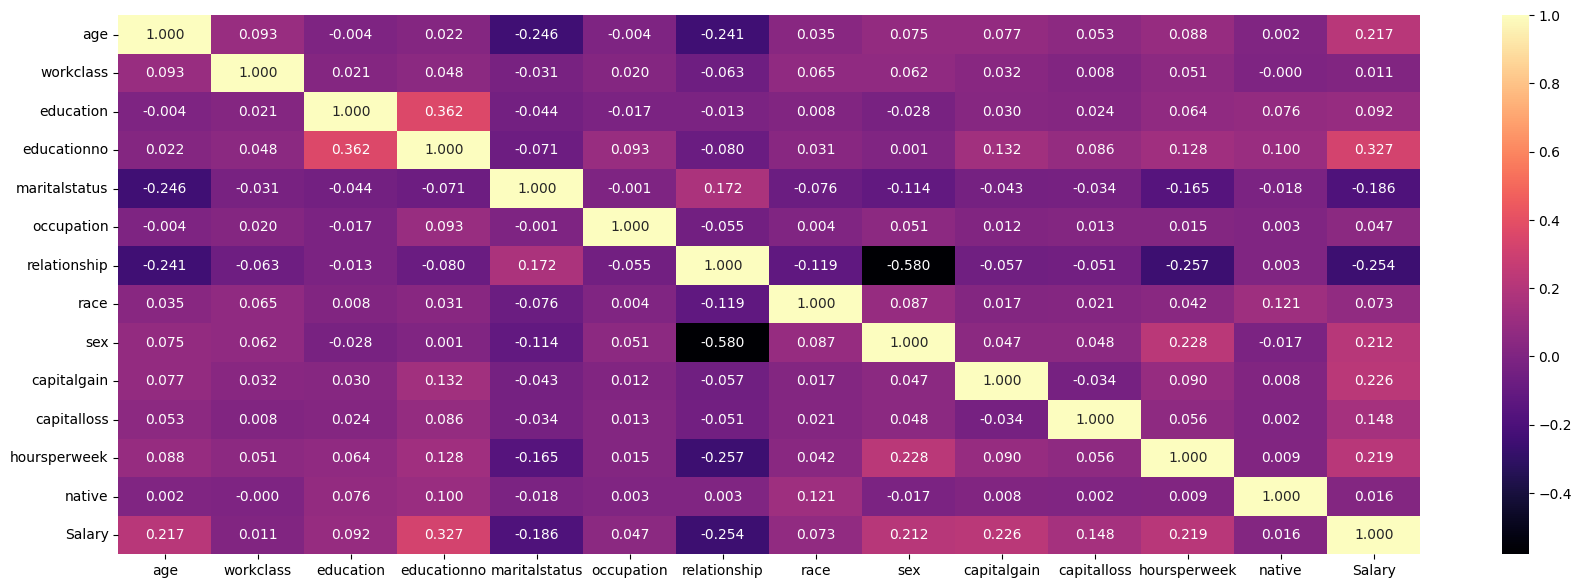

In [22]:
plt.figure(figsize = (21, 7));
sns.heatmap(salary_test.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

# Applying Train and Test split on Salary Dataset:

In [23]:
x_train = s_t.iloc[:,0:13]
y_train = s_t.iloc[:,-1]   #last column is -1

In [24]:
x_test = salary_test.iloc[:,0:13]
y_test = salary_test.iloc[:,-1]

In [25]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((11398, 13), (11398,), (14130, 13), (14130,))

# Naive Bayes Classification :
# MultinomialNB
# CategoricalNB
# GaussianNB

# 1. MultinomialNB

In [26]:
x_train.dropna()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12081,43,2,6,5,4,6,1,4,0,0,0,20,37
12082,45,2,11,9,2,6,0,2,1,3137,0,35,37
12083,24,2,11,9,2,11,0,4,1,0,0,40,24
12084,63,2,6,5,2,4,0,2,1,0,0,40,37


In [27]:
# Preparing a Multinomial naive bayes model on training data set
from sklearn.naive_bayes import MultinomialNB as MB    # Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(x_train,y_train)     # Model Train


MultinomialNB()

In [28]:
# Model Accuracy on train set
train_pred_m = classifier_mb.predict(x_train)
accuracy_train_m = np.mean(train_pred_m==y_train)
# Model Accuracy on test set
test_pred_m = classifier_mb.predict(x_train)
accuracy_test_m = np.mean(test_pred_m==y_train)
accuracy_train_m

0.7703105808036498

In [29]:
accuracy_test_m

0.7703105808036498

# 2. CategoricalNB

In [30]:
# Preparing a Categorical naive bayes model on training data set
from sklearn.naive_bayes import CategoricalNB as CNB
classifier_cnb = CNB()
classifier_cnb.fit(x_train,y_train)    # Model Train

CategoricalNB()

In [31]:
# Model Accuracy on train set
train_pred_cnb = classifier_cnb.predict(x_train)
accuracy_train_cnb = np.mean(train_pred_cnb==y_train)
# Model Accuracy on test set
test_pred_cnb = classifier_cnb.predict(x_train)
accuracy_test_cnb = np.mean(test_pred_cnb==y_train)
accuracy_train_cnb

0.8506755571152834

In [32]:
accuracy_test_cnb

0.8506755571152834

# 3. GaussianNB

In [33]:
# Preparing a Gaussian naive bayes model on training data set
from sklearn.naive_bayes import GaussianNB as GB
classifier_gb = GB()
classifier_gb.fit(x_train,y_train)

GaussianNB()

In [34]:
# Model Accuracy on train set
train_pred_g = classifier_gb.predict(x_train)
accuracy_train_g = np.mean(train_pred_g==y_train)
# Model Accuracy on test set
test_pred_g = classifier_gb.predict(x_train)
accuracy_test_g = np.mean(test_pred_g==y_train)
accuracy_train_g

0.7968941919635024

In [35]:
accuracy_test_g

0.7968941919635024